### Capricorn - Logs analyzer

This file contains the differents python functions to analyze the logs produced by the Capricorn system.

Here is the points that we will analyze:

- Number of cesnas in the simulation
- Speed of the cesnas
- Number of cesnas that were catched
- Number of shot on the factory
- Number of missed missiles
- Number of missed cesnas
- Distance of interception (mean, min, max)

Nombre de cesnas : 120
Vitesse des cesnas : 200.0 km/h
Nombre de cesnas interceptés : 81
Nombre de tirs sur l'usine : 0
Nombre de missiles manqués : 170
Nombre de cesnas manqués : 39
Distance d'interception (moyenne) : 315.99
Distance d'interception (min) : 300.00
Distance d'interception (max) : 330.07
Pourcentage de réussite des interceptions : 67.50%


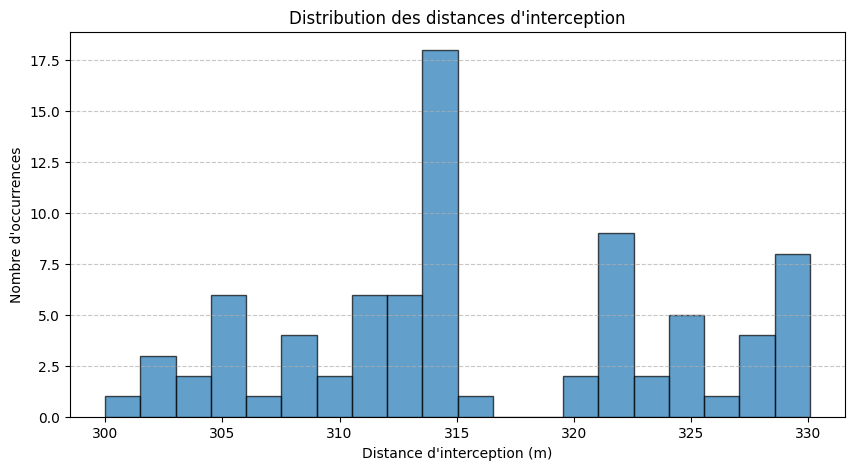

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import glob
import os

# Charger tous les fichiers CSV du dossier log
log_dir = "../log"  
csv_files = glob.glob(os.path.join(log_dir, "*.csv"))

if not csv_files:
    print("Aucun fichier CSV trouvé dans le dossier log.")
else:
    # Charger et concaténer tous les fichiers CSV
    df = pd.concat([pd.read_csv(file, delimiter=";") for file in csv_files], ignore_index=True)

    # Nombre de cesnas dans la simulation
    num_cesnas = df[df["Fonction"] == "scenario_simple"]["Message"].str.extract(r'nb_mobiles,(\d+)').dropna().astype(int).sum()[0]

    # Vitesse des cesnas
    cesna_speed = df[df["Fonction"] == "scenario_simple"]["Message"].str.extract(r'mobiles_speed,([\d.]+)').dropna().astype(float).mean()[0]

    # Nombre de cesnas interceptés
    num_cesnas_caught = df[df["Fonction"] == "checkImpact"]["Message"].str.contains("Interception_mobile").sum()

    # Nombre de tirs sur l’usine
    num_factory_shots = df[df["Fonction"] == "propertyChange"]["Message"].str.contains("factory_damage").sum()

    # Nombre de missiles manqués (missile_shot - interceptions)
    num_missiles_shot = df[df["Fonction"] == "scheduleFireMissile"]["Message"].str.contains("missile_shot").sum()
    num_missiles_missed = num_missiles_shot - num_cesnas_caught

    # Nombre de cesnas non interceptés
    num_cesnas_missed = num_cesnas - num_cesnas_caught

    # Distances d'interception
    distances = df[df["Fonction"] == "checkImpact"]["Message"].str.extract(r'distance, ([\d.]+)').dropna().astype(float)
    mean_distance = distances.mean()[0]
    min_distance = distances.min()[0]
    max_distance = distances.max()[0]

    # Résumé des résultats
    print(f"Nombre de cesnas : {num_cesnas}")
    print(f"Vitesse des cesnas : {cesna_speed} km/h")
    print(f"Nombre de cesnas interceptés : {num_cesnas_caught}")
    print(f"Nombre de tirs sur l'usine : {num_factory_shots}")
    print(f"Nombre de missiles manqués : {num_missiles_missed}")
    print(f"Nombre de cesnas manqués : {num_cesnas_missed}")
    print(f"Distance d'interception (moyenne) : {mean_distance:.2f}")
    print(f"Distance d'interception (min) : {min_distance:.2f}")
    print(f"Distance d'interception (max) : {max_distance:.2f}")

    # pourcentage de réussite des interceptions
    intercept_success_rate = num_cesnas_caught / num_cesnas * 100
    print(f"Pourcentage de réussite des interceptions : {intercept_success_rate:.2f}%")
  
    plt.figure(figsize=(10, 5))
    plt.hist(distances[0], bins=20, edgecolor='black', alpha=0.7)
    plt.xlabel("Distance d'interception (m)")
    plt.ylabel("Nombre d'occurrences")
    plt.title("Distribution des distances d'interception")
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()



===== Analyse du Scénario: Scenario =====
Configuration : Configuration non trouvée
Nombre de cesnas : Inconnu
Vitesse des cesnas : Inconnu
Nombre de cesnas interceptés : 0
Nombre de tirs sur l'usine : 0
Nombre de missiles manqués : 0
Nombre de cesnas manqués : Inconnu
Aucune interception enregistrée



===== Analyse du Scénario: CAPRICORN v=200.0 n=3 d=0 r=0 =====
Configuration : scenario_name,CAPRICORN v=200.0 n=3 d=0 r=0
Nombre de cesnas : 3
Vitesse des cesnas : 200.0
Nombre de cesnas interceptés : 2
Nombre de tirs sur l'usine : 0
Nombre de missiles manqués : 4
Nombre de cesnas manqués : 1
Distance d'interception (moyenne) : 317.81
Distance d'interception (min) : 313.89
Distance d'interception (max) : 321.74


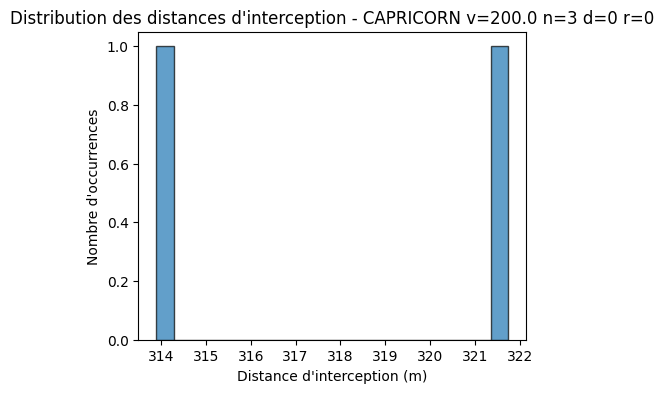


===== Analyse du Scénario: CAPRICORN v=200.0 n=3 d=0 r=1 =====
Configuration : scenario_name,CAPRICORN v=200.0 n=3 d=0 r=1
Nombre de cesnas : 3
Vitesse des cesnas : 200.0
Nombre de cesnas interceptés : 1
Nombre de tirs sur l'usine : 0
Nombre de missiles manqués : 5
Nombre de cesnas manqués : 2
Distance d'interception (moyenne) : 313.89
Distance d'interception (min) : 313.89
Distance d'interception (max) : 313.89


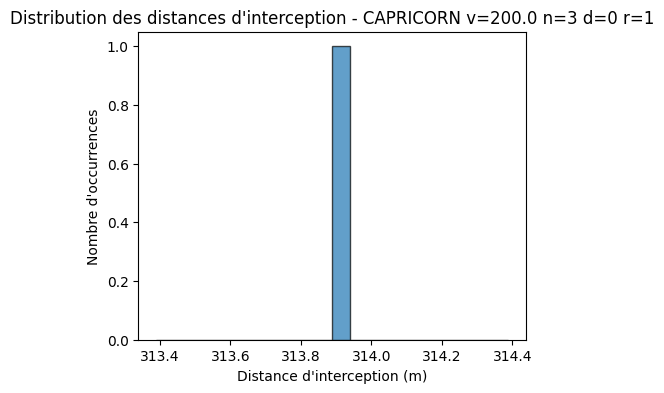


===== Analyse du Scénario: CAPRICORN v=200.0 n=3 d=1 r=0 =====
Configuration : scenario_name,CAPRICORN v=200.0 n=3 d=1 r=0
Nombre de cesnas : 3
Vitesse des cesnas : 200.0
Nombre de cesnas interceptés : 3
Nombre de tirs sur l'usine : 0
Nombre de missiles manqués : 3
Nombre de cesnas manqués : 0
Distance d'interception (moyenne) : 312.48
Distance d'interception (min) : 310.63
Distance d'interception (max) : 313.89


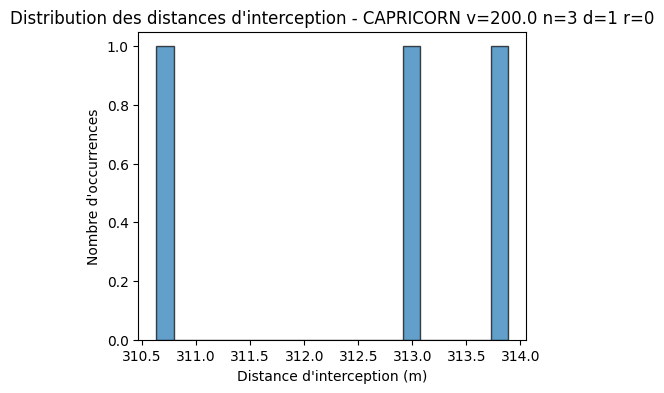


===== Analyse du Scénario: CAPRICORN v=200.0 n=3 d=1 r=1 =====
Configuration : scenario_name,CAPRICORN v=200.0 n=3 d=1 r=1
Nombre de cesnas : 3
Vitesse des cesnas : 200.0
Nombre de cesnas interceptés : 2
Nombre de tirs sur l'usine : 0
Nombre de missiles manqués : 4
Nombre de cesnas manqués : 1
Distance d'interception (moyenne) : 312.26
Distance d'interception (min) : 310.63
Distance d'interception (max) : 313.89


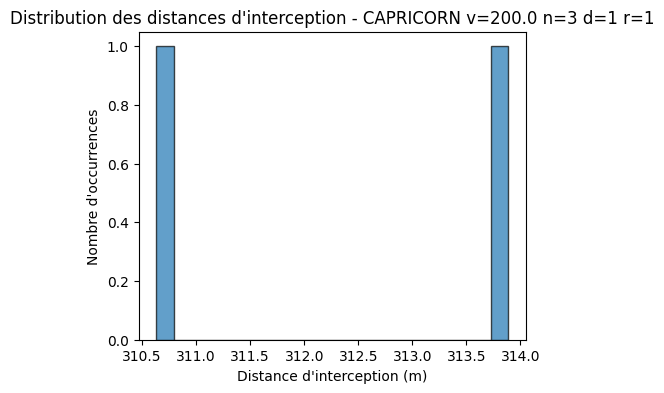


===== Analyse du Scénario: CAPRICORN v=200.0 n=3 d=2 r=0 =====
Configuration : scenario_name,CAPRICORN v=200.0 n=3 d=2 r=0
Nombre de cesnas : 3
Vitesse des cesnas : 200.0
Nombre de cesnas interceptés : 3
Nombre de tirs sur l'usine : 0
Nombre de missiles manqués : 3
Nombre de cesnas manqués : 0
Distance d'interception (moyenne) : 316.18
Distance d'interception (min) : 310.14
Distance d'interception (max) : 324.52


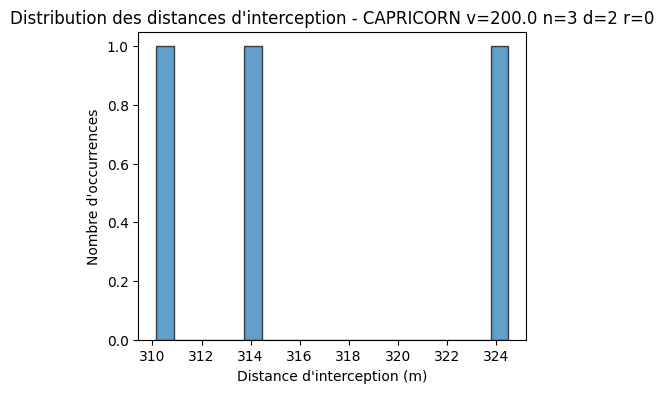


===== Analyse du Scénario: CAPRICORN v=200.0 n=3 d=2 r=1 =====
Configuration : scenario_name,CAPRICORN v=200.0 n=3 d=2 r=1
Nombre de cesnas : 3
Vitesse des cesnas : 200.0
Nombre de cesnas interceptés : 2
Nombre de tirs sur l'usine : 0
Nombre de missiles manqués : 4
Nombre de cesnas manqués : 1
Distance d'interception (moyenne) : 319.20
Distance d'interception (min) : 313.89
Distance d'interception (max) : 324.52


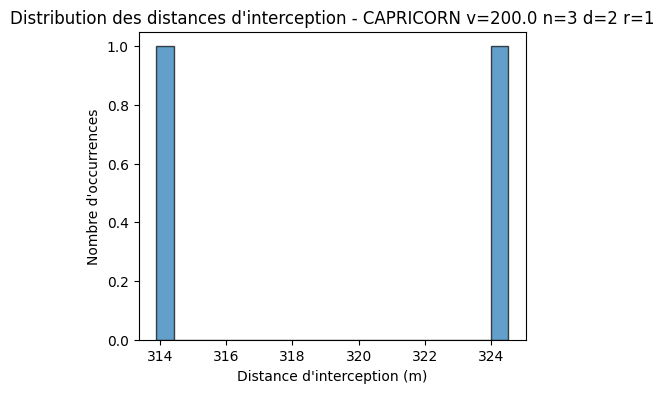


===== Analyse du Scénario: CAPRICORN v=200.0 n=3 d=3 r=0 =====
Configuration : scenario_name,CAPRICORN v=200.0 n=3 d=3 r=0
Nombre de cesnas : 3
Vitesse des cesnas : 200.0
Nombre de cesnas interceptés : 3
Nombre de tirs sur l'usine : 0
Nombre de missiles manqués : 6
Nombre de cesnas manqués : 0
Distance d'interception (moyenne) : 321.90
Distance d'interception (min) : 305.56
Distance d'interception (max) : 330.07


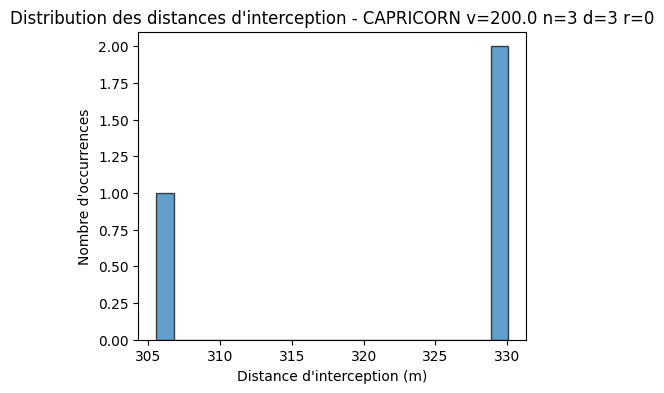


===== Analyse du Scénario: CAPRICORN v=200.0 n=3 d=3 r=1 =====
Configuration : scenario_name,CAPRICORN v=200.0 n=3 d=3 r=1
Nombre de cesnas : 3
Vitesse des cesnas : 200.0
Nombre de cesnas interceptés : 2
Nombre de tirs sur l'usine : 0
Nombre de missiles manqués : 6
Nombre de cesnas manqués : 1
Distance d'interception (moyenne) : 317.57
Distance d'interception (min) : 313.89
Distance d'interception (max) : 321.26


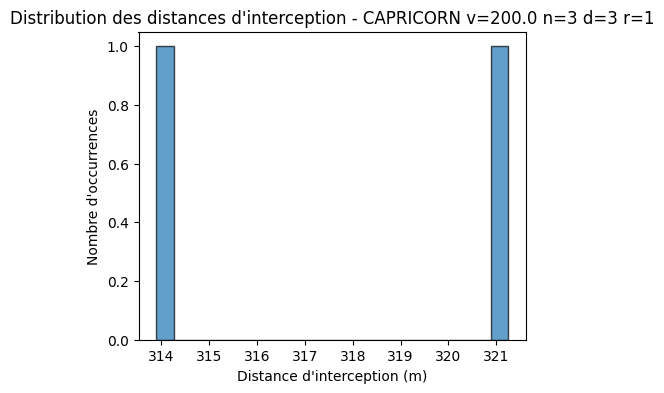


===== Analyse du Scénario: CAPRICORN v=200.0 n=3 d=4 r=0 =====
Configuration : scenario_name,CAPRICORN v=200.0 n=3 d=4 r=0
Nombre de cesnas : 3
Vitesse des cesnas : 200.0
Nombre de cesnas interceptés : 2
Nombre de tirs sur l'usine : 0
Nombre de missiles manqués : 6
Nombre de cesnas manqués : 1
Distance d'interception (moyenne) : 310.87
Distance d'interception (min) : 307.85
Distance d'interception (max) : 313.89


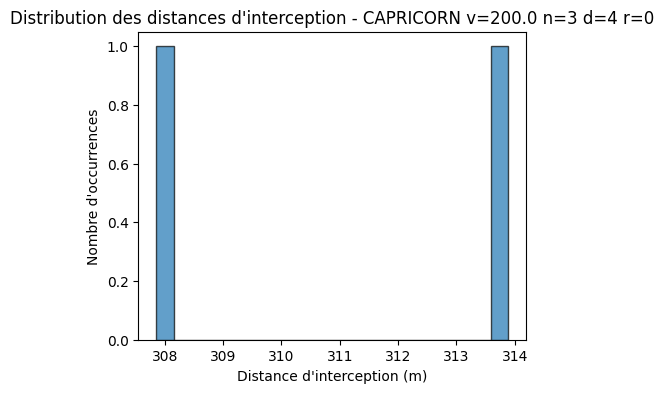


===== Analyse du Scénario: CAPRICORN v=200.0 n=3 d=4 r=1 =====
Configuration : scenario_name,CAPRICORN v=200.0 n=3 d=4 r=1
Nombre de cesnas : 3
Vitesse des cesnas : 200.0
Nombre de cesnas interceptés : 2
Nombre de tirs sur l'usine : 0
Nombre de missiles manqués : 6
Nombre de cesnas manqués : 1
Distance d'interception (moyenne) : 317.81
Distance d'interception (min) : 308.33
Distance d'interception (max) : 327.30


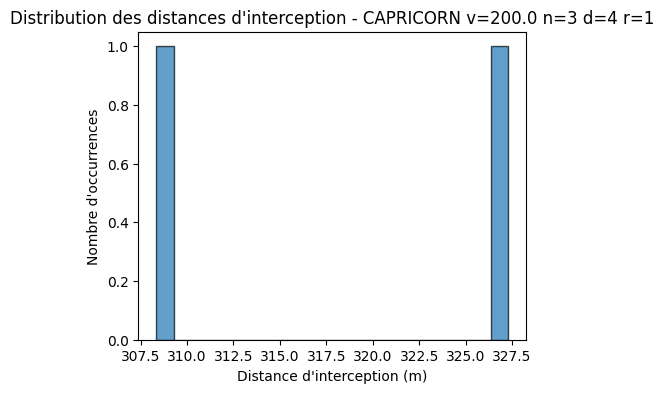


===== Analyse du Scénario: CAPRICORN v=200.0 n=4 d=0 r=0 =====
Configuration : scenario_name,CAPRICORN v=200.0 n=4 d=0 r=0
Nombre de cesnas : 4
Vitesse des cesnas : 200.0
Nombre de cesnas interceptés : 2
Nombre de tirs sur l'usine : 0
Nombre de missiles manqués : 8
Nombre de cesnas manqués : 2
Distance d'interception (moyenne) : 317.81
Distance d'interception (min) : 308.33
Distance d'interception (max) : 327.30


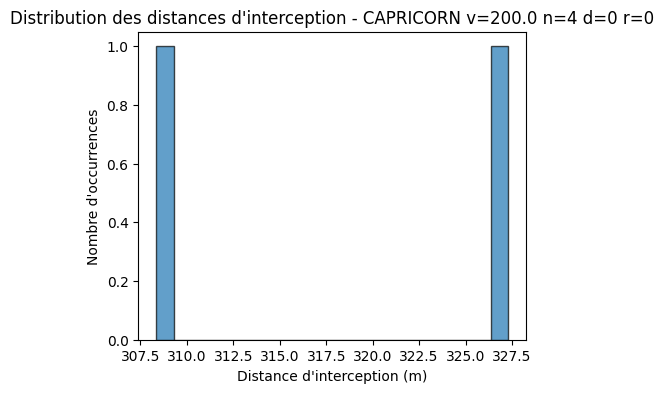


===== Analyse du Scénario: CAPRICORN v=200.0 n=4 d=0 r=1 =====
Configuration : scenario_name,CAPRICORN v=200.0 n=4 d=0 r=1
Nombre de cesnas : 4
Vitesse des cesnas : 200.0
Nombre de cesnas interceptés : 3
Nombre de tirs sur l'usine : 0
Nombre de missiles manqués : 5
Nombre de cesnas manqués : 1
Distance d'interception (moyenne) : 312.48
Distance d'interception (min) : 310.63
Distance d'interception (max) : 313.89


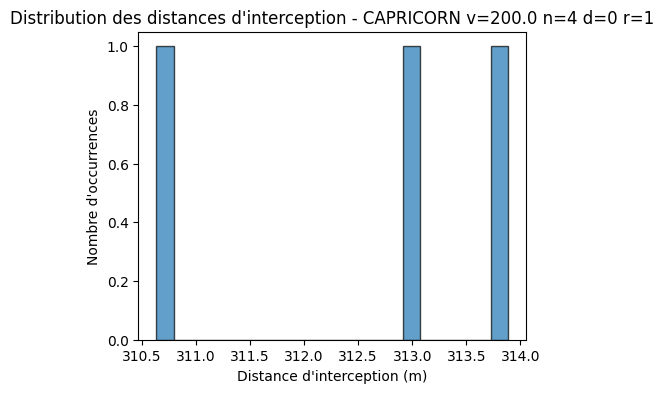


===== Analyse du Scénario: CAPRICORN v=200.0 n=4 d=1 r=0 =====
Configuration : scenario_name,CAPRICORN v=200.0 n=4 d=1 r=0
Nombre de cesnas : 4
Vitesse des cesnas : 200.0
Nombre de cesnas interceptés : 2
Nombre de tirs sur l'usine : 0
Nombre de missiles manqués : 6
Nombre de cesnas manqués : 2
Distance d'interception (moyenne) : 317.81
Distance d'interception (min) : 313.89
Distance d'interception (max) : 321.74


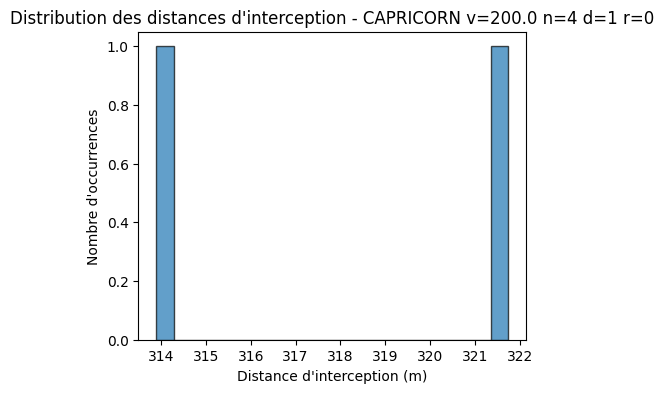


===== Analyse du Scénario: CAPRICORN v=200.0 n=4 d=1 r=1 =====
Configuration : scenario_name,CAPRICORN v=200.0 n=4 d=1 r=1
Nombre de cesnas : 4
Vitesse des cesnas : 200.0
Nombre de cesnas interceptés : 3
Nombre de tirs sur l'usine : 0
Nombre de missiles manqués : 5
Nombre de cesnas manqués : 1
Distance d'interception (moyenne) : 313.41
Distance d'interception (min) : 302.78
Distance d'interception (max) : 324.52


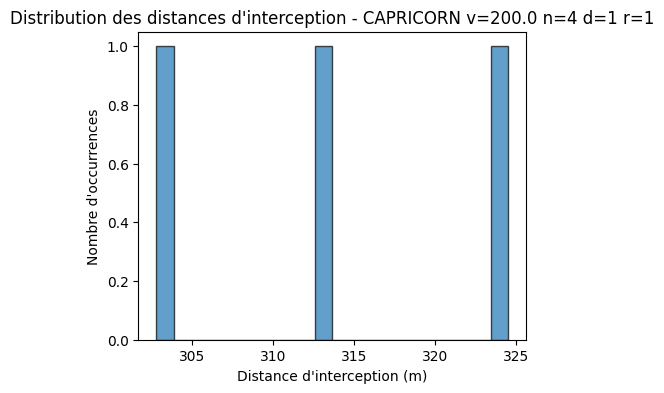


===== Analyse du Scénario: CAPRICORN v=200.0 n=4 d=2 r=0 =====
Configuration : scenario_name,CAPRICORN v=200.0 n=4 d=2 r=0
Nombre de cesnas : 4
Vitesse des cesnas : 200.0
Nombre de cesnas interceptés : 3
Nombre de tirs sur l'usine : 0
Nombre de missiles manqués : 5
Nombre de cesnas manqués : 1
Distance d'interception (moyenne) : 312.48
Distance d'interception (min) : 302.78
Distance d'interception (max) : 321.74


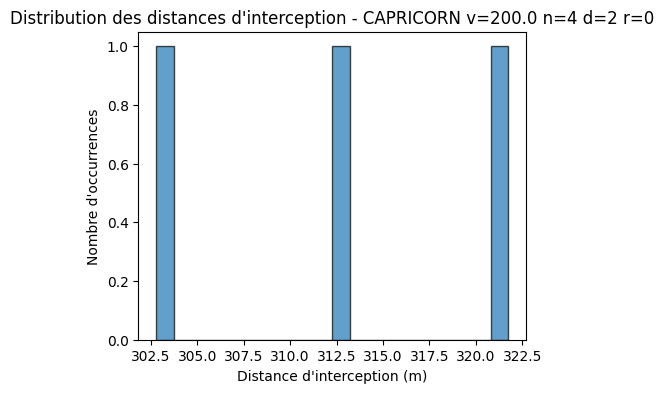


===== Analyse du Scénario: CAPRICORN v=200.0 n=4 d=2 r=1 =====
Configuration : scenario_name,CAPRICORN v=200.0 n=4 d=2 r=1
Nombre de cesnas : 4
Vitesse des cesnas : 200.0
Nombre de cesnas interceptés : 2
Nombre de tirs sur l'usine : 0
Nombre de missiles manqués : 8
Nombre de cesnas manqués : 2
Distance d'interception (moyenne) : 316.43
Distance d'interception (min) : 313.89
Distance d'interception (max) : 318.96


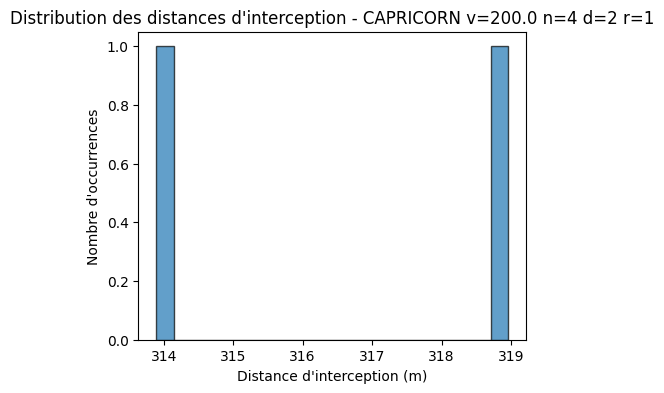


===== Analyse du Scénario: CAPRICORN v=200.0 n=4 d=3 r=0 =====
Configuration : scenario_name,CAPRICORN v=200.0 n=4 d=3 r=0
Nombre de cesnas : 4
Vitesse des cesnas : 200.0
Nombre de cesnas interceptés : 2
Nombre de tirs sur l'usine : 0
Nombre de missiles manqués : 6
Nombre de cesnas manqués : 2
Distance d'interception (moyenne) : 317.57
Distance d'interception (min) : 313.89
Distance d'interception (max) : 321.26


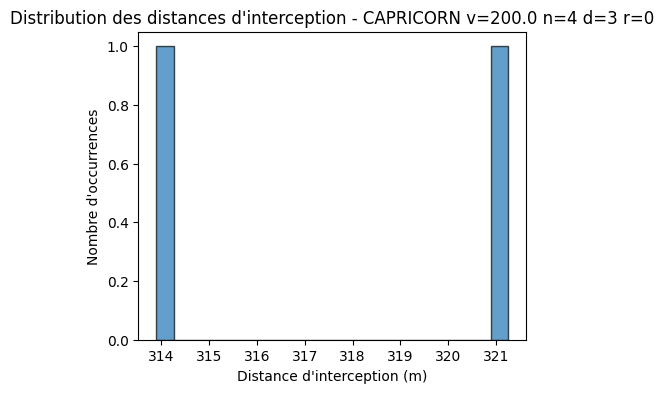


===== Analyse du Scénario: CAPRICORN v=200.0 n=4 d=3 r=1 =====
Configuration : scenario_name,CAPRICORN v=200.0 n=4 d=3 r=1
Nombre de cesnas : 4
Vitesse des cesnas : 200.0
Nombre de cesnas interceptés : 4
Nombre de tirs sur l'usine : 0
Nombre de missiles manqués : 6
Nombre de cesnas manqués : 0
Distance d'interception (moyenne) : 310.97
Distance d'interception (min) : 303.67
Distance d'interception (max) : 321.26


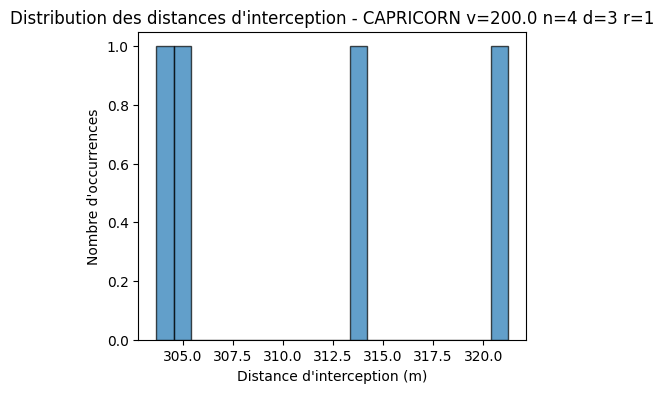


===== Analyse du Scénario: CAPRICORN v=200.0 n=4 d=4 r=0 =====
Configuration : scenario_name,CAPRICORN v=200.0 n=4 d=4 r=0
Nombre de cesnas : 4
Vitesse des cesnas : 200.0
Nombre de cesnas interceptés : 2
Nombre de tirs sur l'usine : 0
Nombre de missiles manqués : 6
Nombre de cesnas manqués : 2
Distance d'interception (moyenne) : 312.26
Distance d'interception (min) : 310.63
Distance d'interception (max) : 313.89


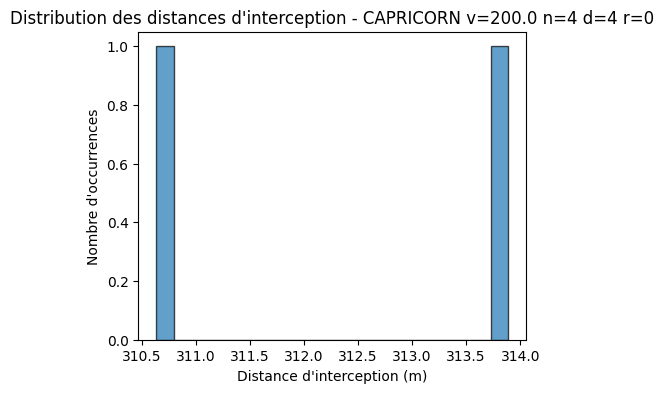


===== Analyse du Scénario: CAPRICORN v=200.0 n=4 d=4 r=1 =====
Configuration : scenario_name,CAPRICORN v=200.0 n=4 d=4 r=1
Nombre de cesnas : 4
Vitesse des cesnas : 200.0
Nombre de cesnas interceptés : 2
Nombre de tirs sur l'usine : 0
Nombre de missiles manqués : 10
Nombre de cesnas manqués : 2
Distance d'interception (moyenne) : 309.24
Distance d'interception (min) : 308.33
Distance d'interception (max) : 310.14


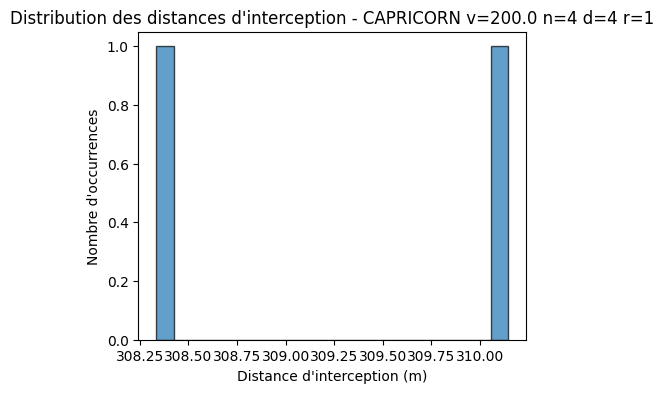


===== Analyse du Scénario: CAPRICORN v=200.0 n=5 d=0 r=0 =====
Configuration : scenario_name,CAPRICORN v=200.0 n=5 d=0 r=0
Nombre de cesnas : 5
Vitesse des cesnas : 200.0
Nombre de cesnas interceptés : 3
Nombre de tirs sur l'usine : 0
Nombre de missiles manqués : 7
Nombre de cesnas manqués : 2
Distance d'interception (moyenne) : 312.48
Distance d'interception (min) : 310.63
Distance d'interception (max) : 313.89


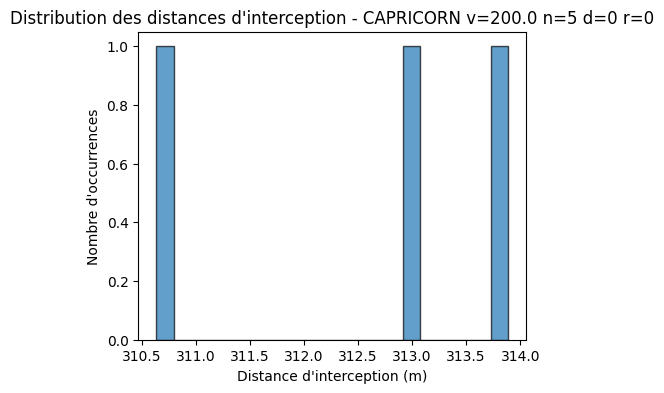


===== Analyse du Scénario: CAPRICORN v=200.0 n=5 d=0 r=1 =====
Configuration : scenario_name,CAPRICORN v=200.0 n=5 d=0 r=1
Nombre de cesnas : 5
Vitesse des cesnas : 200.0
Nombre de cesnas interceptés : 3
Nombre de tirs sur l'usine : 0
Nombre de missiles manqués : 7
Nombre de cesnas manqués : 2
Distance d'interception (moyenne) : 320.51
Distance d'interception (min) : 313.89
Distance d'interception (max) : 324.52


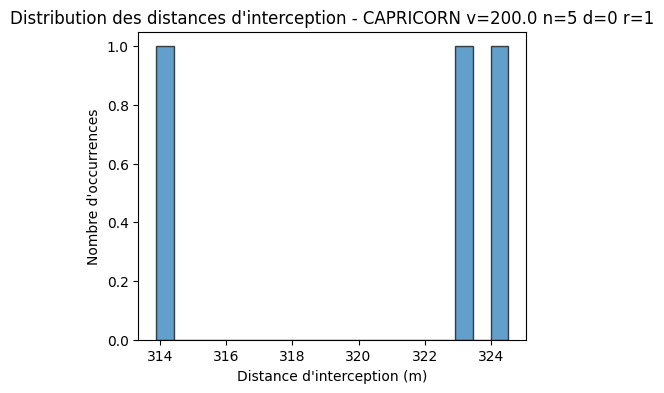


===== Analyse du Scénario: CAPRICORN v=200.0 n=5 d=1 r=0 =====
Configuration : scenario_name,CAPRICORN v=200.0 n=5 d=1 r=0
Nombre de cesnas : 5
Vitesse des cesnas : 200.0
Nombre de cesnas interceptés : 4
Nombre de tirs sur l'usine : 0
Nombre de missiles manqués : 7
Nombre de cesnas manqués : 1
Distance d'interception (moyenne) : 310.87
Distance d'interception (min) : 302.78
Distance d'interception (max) : 319.94


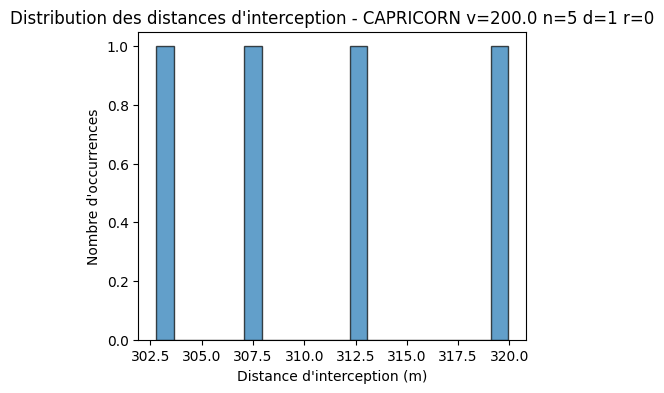


===== Analyse du Scénario: CAPRICORN v=200.0 n=5 d=1 r=1 =====
Configuration : scenario_name,CAPRICORN v=200.0 n=5 d=1 r=1
Nombre de cesnas : 5
Vitesse des cesnas : 200.0
Nombre de cesnas interceptés : 3
Nombre de tirs sur l'usine : 0
Nombre de missiles manqués : 7
Nombre de cesnas manqués : 2
Distance d'interception (moyenne) : 319.58
Distance d'interception (min) : 313.89
Distance d'interception (max) : 323.12


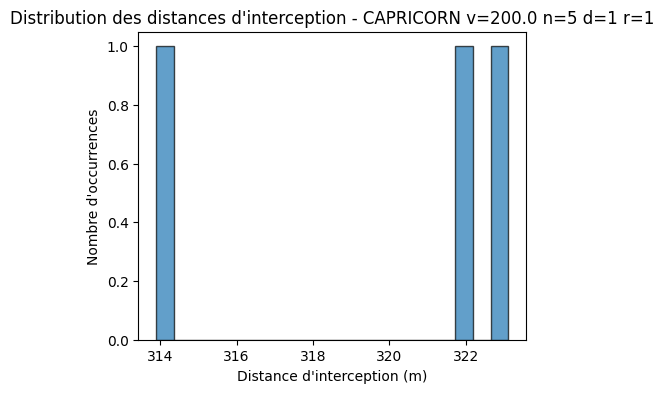


===== Analyse du Scénario: CAPRICORN v=200.0 n=5 d=2 r=0 =====
Configuration : scenario_name,CAPRICORN v=200.0 n=5 d=2 r=0
Nombre de cesnas : 5
Vitesse des cesnas : 200.0
Nombre de cesnas interceptés : 3
Nombre de tirs sur l'usine : 0
Nombre de missiles manqués : 7
Nombre de cesnas manqués : 2
Distance d'interception (moyenne) : 318.52
Distance d'interception (min) : 313.89
Distance d'interception (max) : 321.74


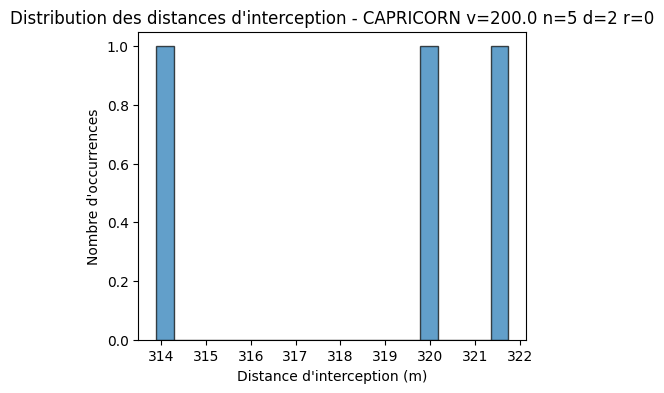


===== Analyse du Scénario: CAPRICORN v=200.0 n=5 d=2 r=1 =====
Configuration : scenario_name,CAPRICORN v=200.0 n=5 d=2 r=1
Nombre de cesnas : 5
Vitesse des cesnas : 200.0
Nombre de cesnas interceptés : 3
Nombre de tirs sur l'usine : 0
Nombre de missiles manqués : 8
Nombre de cesnas manqués : 2
Distance d'interception (moyenne) : 316.67
Distance d'interception (min) : 311.61
Distance d'interception (max) : 324.52


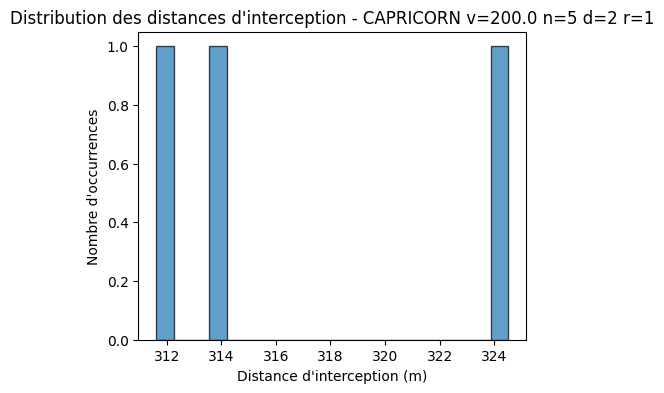


===== Analyse du Scénario: CAPRICORN v=200.0 n=5 d=3 r=0 =====
Configuration : scenario_name,CAPRICORN v=200.0 n=5 d=3 r=0
Nombre de cesnas : 5
Vitesse des cesnas : 200.0
Nombre de cesnas interceptés : 2
Nombre de tirs sur l'usine : 0
Nombre de missiles manqués : 6
Nombre de cesnas manqués : 3
Distance d'interception (moyenne) : 317.57
Distance d'interception (min) : 313.89
Distance d'interception (max) : 321.26


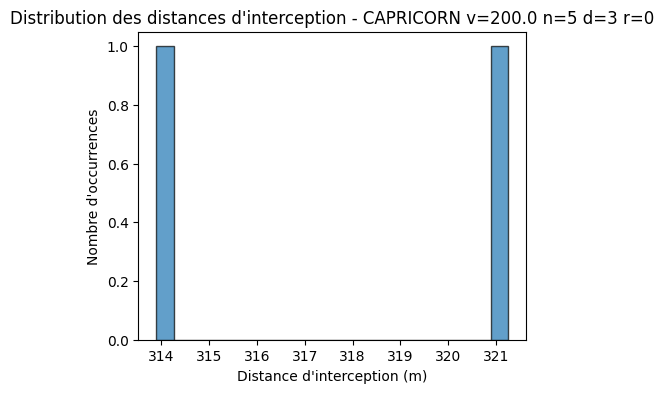


===== Analyse du Scénario: CAPRICORN v=200.0 n=5 d=3 r=1 =====
Configuration : scenario_name,CAPRICORN v=200.0 n=5 d=3 r=1
Nombre de cesnas : 5
Vitesse des cesnas : 200.0
Nombre de cesnas interceptés : 4
Nombre de tirs sur l'usine : 0
Nombre de missiles manqués : 7
Nombre de cesnas manqués : 1
Distance d'interception (moyenne) : 312.63
Distance d'interception (min) : 302.30
Distance d'interception (max) : 322.72


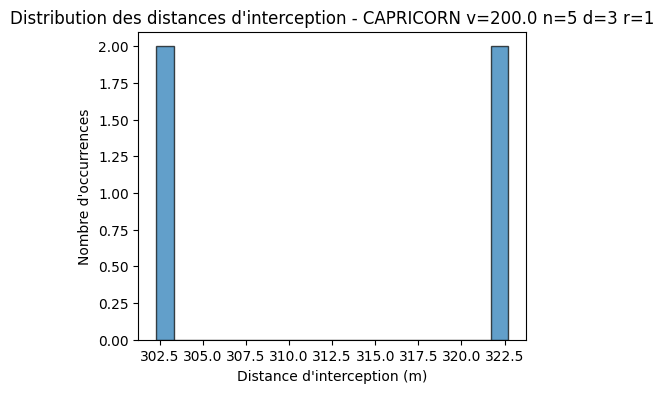


===== Analyse du Scénario: CAPRICORN v=200.0 n=5 d=4 r=0 =====
Configuration : scenario_name,CAPRICORN v=200.0 n=5 d=4 r=0
Nombre de cesnas : 5
Vitesse des cesnas : 200.0
Nombre de cesnas interceptés : 3
Nombre de tirs sur l'usine : 0
Nombre de missiles manqués : 8
Nombre de cesnas manqués : 2
Distance d'interception (moyenne) : 313.41
Distance d'interception (min) : 297.22
Distance d'interception (max) : 324.52


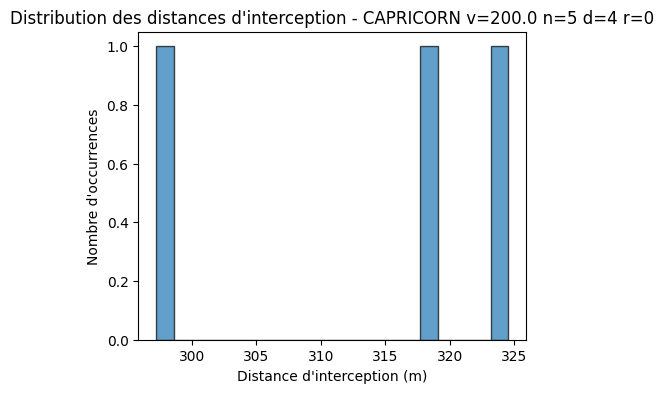


===== Analyse du Scénario: CAPRICORN v=200.0 n=5 d=4 r=1 =====
Configuration : scenario_name,CAPRICORN v=200.0 n=5 d=4 r=1
Nombre de cesnas : 5
Vitesse des cesnas : 200.0
Nombre de cesnas interceptés : 3
Nombre de tirs sur l'usine : 0
Nombre de missiles manqués : 7
Nombre de cesnas manqués : 2
Distance d'interception (moyenne) : 320.51
Distance d'interception (min) : 313.89
Distance d'interception (max) : 324.52


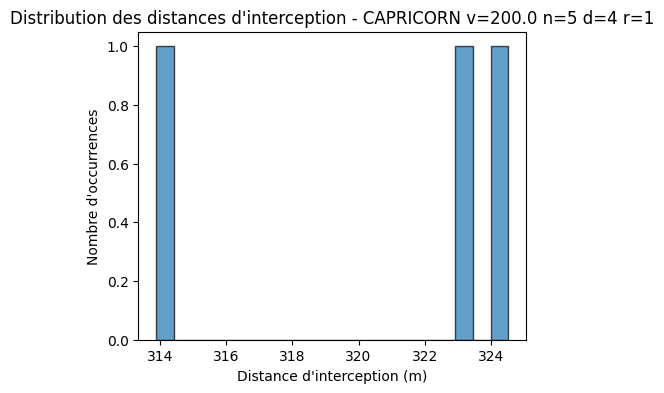


===== Analyse du Scénario: CAPRICORN v=300.0 n=3 d=0 r=0 =====
Configuration : scenario_name,CAPRICORN v=300.0 n=3 d=0 r=0
Nombre de cesnas : 3
Vitesse des cesnas : 300.0
Nombre de cesnas interceptés : 4
Nombre de tirs sur l'usine : 1
Nombre de missiles manqués : 7
Nombre de cesnas manqués : -1
Distance d'interception (moyenne) : 234.36
Distance d'interception (min) : 21.74
Distance d'interception (max) : 315.70


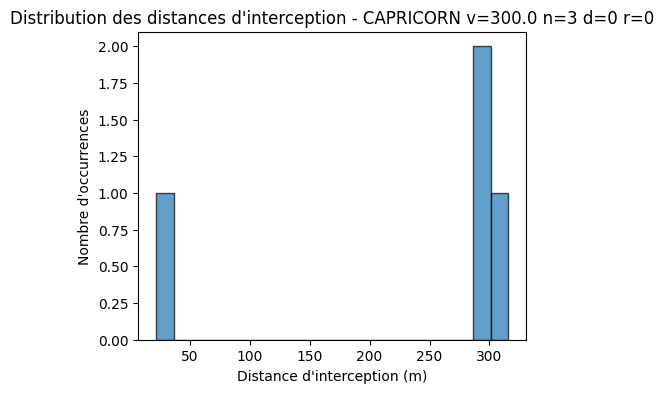


===== Analyse du Scénario: CAPRICORN v=300.0 n=3 d=0 r=1 =====
Configuration : scenario_name,CAPRICORN v=300.0 n=3 d=0 r=1
Nombre de cesnas : 3
Vitesse des cesnas : 300.0
Nombre de cesnas interceptés : 3
Nombre de tirs sur l'usine : 0
Nombre de missiles manqués : 7
Nombre de cesnas manqués : 0
Distance d'interception (moyenne) : 295.81
Distance d'interception (min) : 270.83
Distance d'interception (max) : 317.57


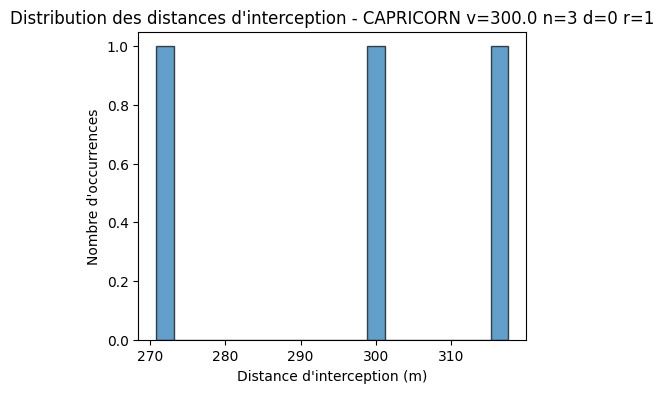


===== Analyse du Scénario: CAPRICORN v=300.0 n=3 d=1 r=0 =====
Configuration : scenario_name,CAPRICORN v=300.0 n=3 d=1 r=0
Nombre de cesnas : 3
Vitesse des cesnas : 300.0
Nombre de cesnas interceptés : 3
Nombre de tirs sur l'usine : 0
Nombre de missiles manqués : 3
Nombre de cesnas manqués : 0
Distance d'interception (moyenne) : 302.76
Distance d'interception (min) : 294.87
Distance d'interception (max) : 313.41


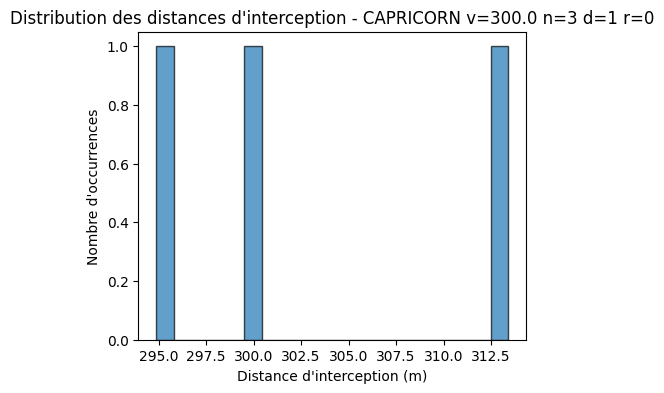


===== Analyse du Scénario: CAPRICORN v=300.0 n=3 d=1 r=1 =====
Configuration : scenario_name,CAPRICORN v=300.0 n=3 d=1 r=1
Nombre de cesnas : 3
Vitesse des cesnas : 300.0
Nombre de cesnas interceptés : 2
Nombre de tirs sur l'usine : 0
Nombre de missiles manqués : 6
Nombre de cesnas manqués : 1
Distance d'interception (moyenne) : 304.62
Distance d'interception (min) : 291.67
Distance d'interception (max) : 317.57


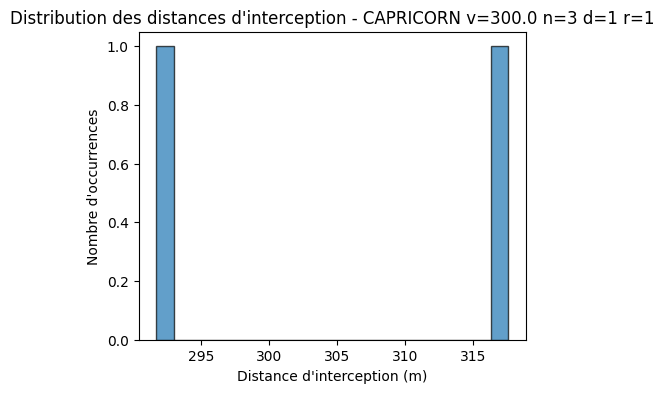


===== Analyse du Scénario: CAPRICORN v=300.0 n=3 d=2 r=0 =====
Configuration : scenario_name,CAPRICORN v=300.0 n=3 d=2 r=0
Nombre de cesnas : 3
Vitesse des cesnas : 300.0
Nombre de cesnas interceptés : 3
Nombre de tirs sur l'usine : 0
Nombre de missiles manqués : 5
Nombre de cesnas manqués : 0
Distance d'interception (moyenne) : 299.98
Distance d'interception (min) : 284.24
Distance d'interception (max) : 315.70


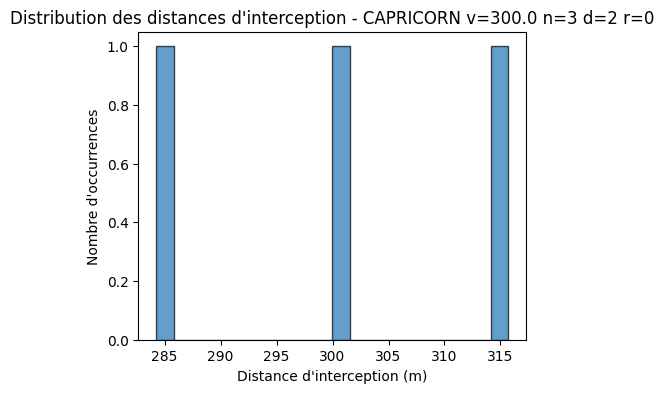


===== Analyse du Scénario: CAPRICORN v=300.0 n=3 d=2 r=1 =====
Configuration : scenario_name,CAPRICORN v=300.0 n=3 d=2 r=1
Nombre de cesnas : 3
Vitesse des cesnas : 300.0
Nombre de cesnas interceptés : 2
Nombre de tirs sur l'usine : 0
Nombre de missiles manqués : 4
Nombre de cesnas manqués : 1
Distance d'interception (moyenne) : 298.37
Distance d'interception (min) : 296.74
Distance d'interception (max) : 300.00


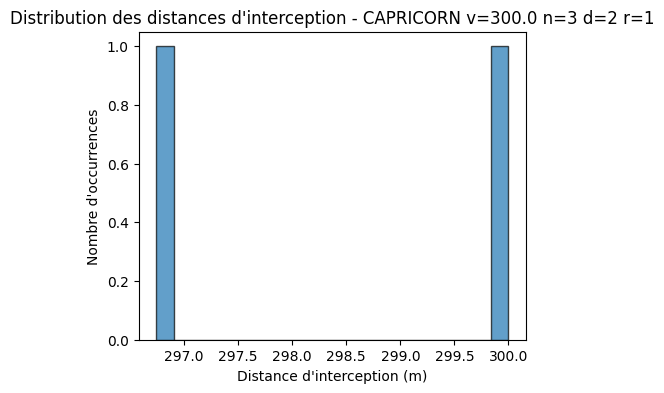


===== Analyse du Scénario: CAPRICORN v=300.0 n=3 d=3 r=0 =====
Configuration : scenario_name,CAPRICORN v=300.0 n=3 d=3 r=0
Nombre de cesnas : 3
Vitesse des cesnas : 300.0
Nombre de cesnas interceptés : 4
Nombre de tirs sur l'usine : 1
Nombre de missiles manqués : 5
Nombre de cesnas manqués : -1
Distance d'interception (moyenne) : 236.20
Distance d'interception (min) : 21.74
Distance d'interception (max) : 315.70


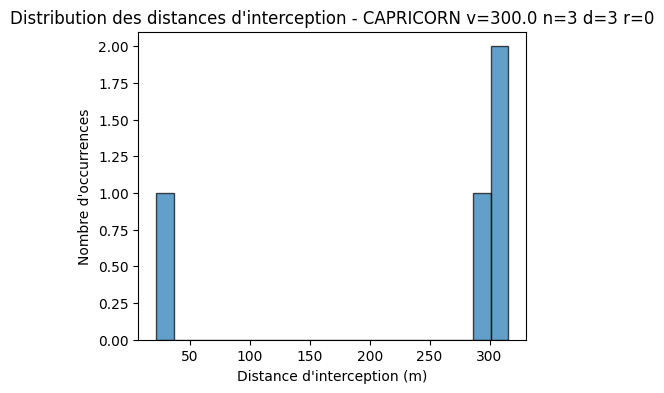


===== Analyse du Scénario: CAPRICORN v=300.0 n=3 d=3 r=1 =====
Configuration : scenario_name,CAPRICORN v=300.0 n=3 d=3 r=1
Nombre de cesnas : 3
Vitesse des cesnas : 300.0
Nombre de cesnas interceptés : 3
Nombre de tirs sur l'usine : 0
Nombre de missiles manqués : 3
Nombre de cesnas manqués : 0
Distance d'interception (moyenne) : 297.20
Distance d'interception (min) : 294.87
Distance d'interception (max) : 300.00


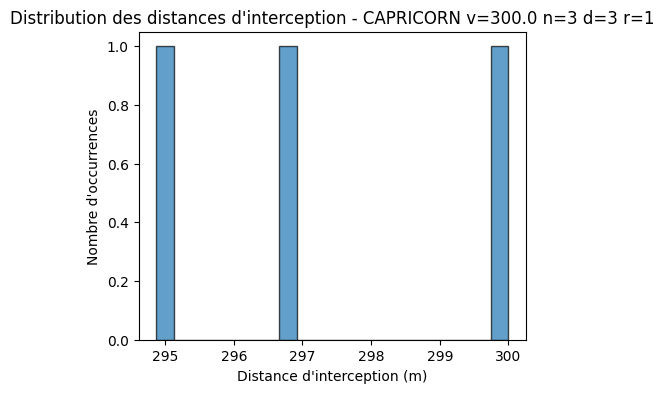


===== Analyse du Scénario: CAPRICORN v=300.0 n=3 d=4 r=0 =====
Configuration : scenario_name,CAPRICORN v=300.0 n=3 d=4 r=0
Nombre de cesnas : 3
Vitesse des cesnas : 300.0
Nombre de cesnas interceptés : 3
Nombre de tirs sur l'usine : 0
Nombre de missiles manqués : 3
Nombre de cesnas manqués : 0
Distance d'interception (moyenne) : 297.20
Distance d'interception (min) : 294.87
Distance d'interception (max) : 300.00


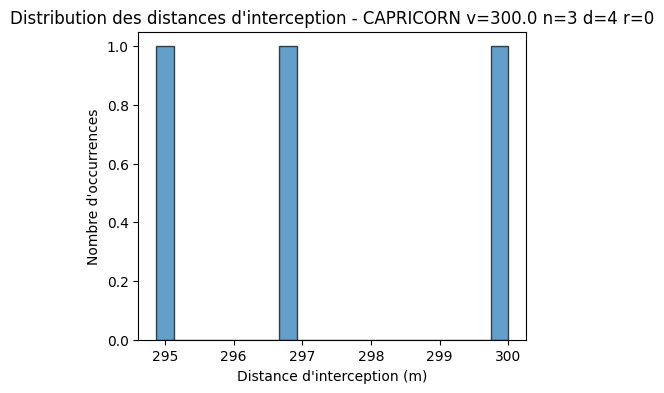


===== Analyse du Scénario: CAPRICORN v=300.0 n=3 d=4 r=1 =====
Configuration : scenario_name,CAPRICORN v=300.0 n=3 d=4 r=1
Nombre de cesnas : 3
Vitesse des cesnas : 300.0
Nombre de cesnas interceptés : 2
Nombre de tirs sur l'usine : 1
Nombre de missiles manqués : 5
Nombre de cesnas manqués : 1
Distance d'interception (moyenne) : 305.77
Distance d'interception (min) : 300.00
Distance d'interception (max) : 311.53


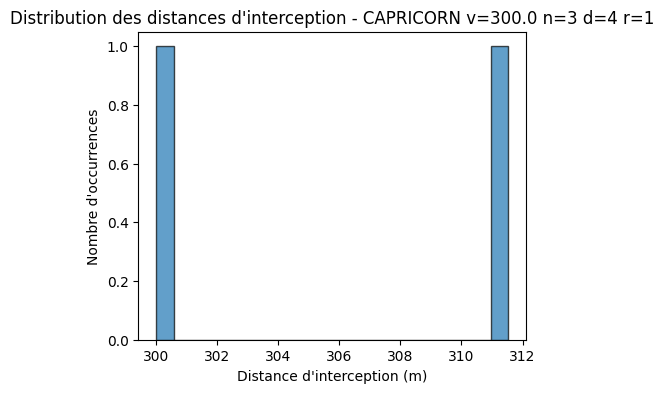


===== Analyse du Scénario: CAPRICORN v=300.0 n=4 d=0 r=0 =====
Configuration : scenario_name,CAPRICORN v=300.0 n=4 d=0 r=0
Nombre de cesnas : 4
Vitesse des cesnas : 300.0
Nombre de cesnas interceptés : 2
Nombre de tirs sur l'usine : 0
Nombre de missiles manqués : 6
Nombre de cesnas manqués : 2
Distance d'interception (moyenne) : 305.77
Distance d'interception (min) : 300.00
Distance d'interception (max) : 311.53


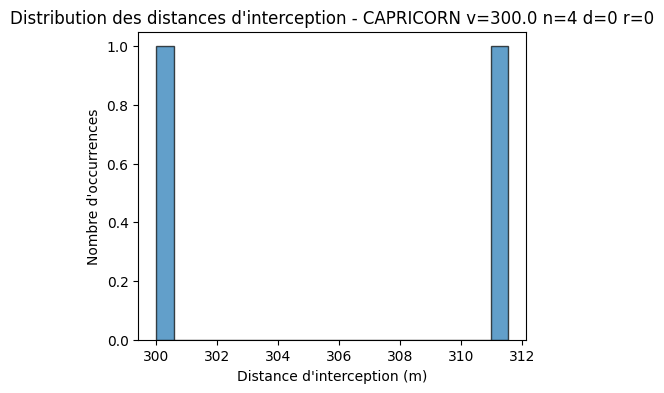


===== Analyse du Scénario: CAPRICORN v=300.0 n=4 d=0 r=1 =====
Configuration : scenario_name,CAPRICORN v=300.0 n=4 d=0 r=1
Nombre de cesnas : 4
Vitesse des cesnas : 300.0
Nombre de cesnas interceptés : 2
Nombre de tirs sur l'usine : 2
Nombre de missiles manqués : 8
Nombre de cesnas manqués : 2
Distance d'interception (moyenne) : 306.70
Distance d'interception (min) : 295.83
Distance d'interception (max) : 317.57


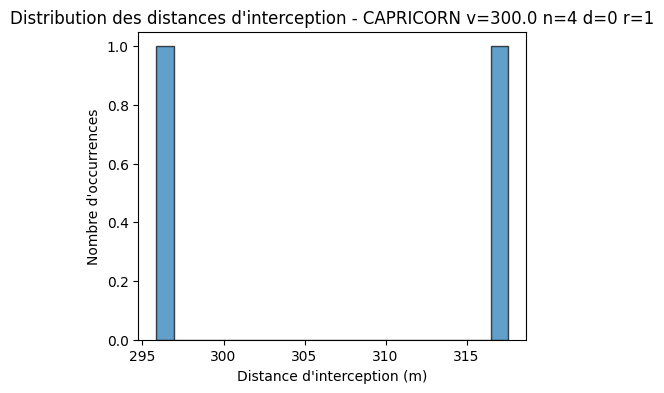


===== Analyse du Scénario: CAPRICORN v=300.0 n=4 d=1 r=0 =====
Configuration : scenario_name,CAPRICORN v=300.0 n=4 d=1 r=0
Nombre de cesnas : 4
Vitesse des cesnas : 300.0
Nombre de cesnas interceptés : 2
Nombre de tirs sur l'usine : 0
Nombre de missiles manqués : 6
Nombre de cesnas manqués : 2
Distance d'interception (moyenne) : 306.70
Distance d'interception (min) : 300.00
Distance d'interception (max) : 313.41


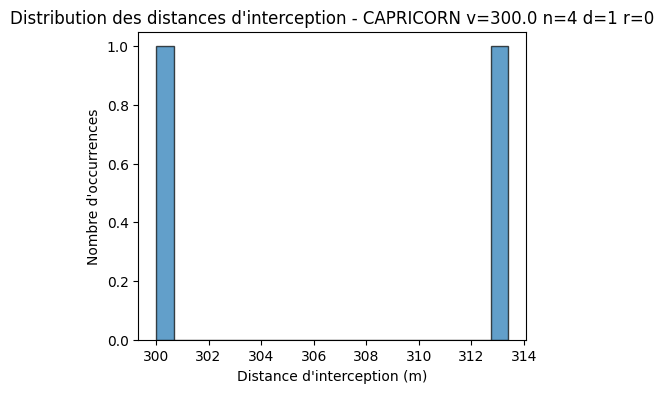


===== Analyse du Scénario: CAPRICORN v=300.0 n=4 d=1 r=1 =====
Configuration : scenario_name,CAPRICORN v=300.0 n=4 d=1 r=1
Nombre de cesnas : 4
Vitesse des cesnas : 300.0
Nombre de cesnas interceptés : 2
Nombre de tirs sur l'usine : 1
Nombre de missiles manqués : 7
Nombre de cesnas manqués : 2
Distance d'interception (moyenne) : 305.77
Distance d'interception (min) : 300.00
Distance d'interception (max) : 311.53


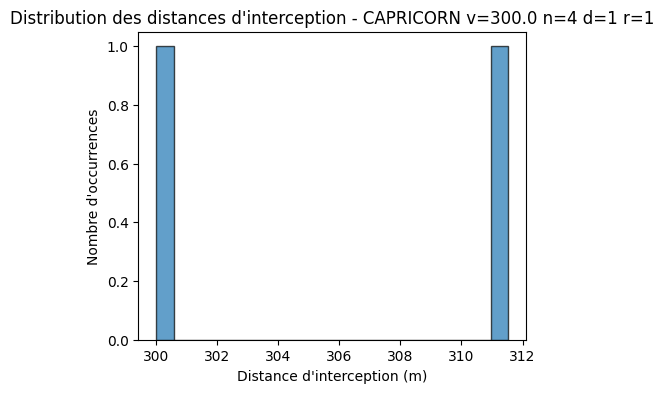


===== Analyse du Scénario: CAPRICORN v=300.0 n=4 d=2 r=0 =====
Configuration : scenario_name,CAPRICORN v=300.0 n=4 d=2 r=0
Nombre de cesnas : 4
Vitesse des cesnas : 300.0
Nombre de cesnas interceptés : 3
Nombre de tirs sur l'usine : 1
Nombre de missiles manqués : 6
Nombre de cesnas manqués : 1
Distance d'interception (moyenne) : 300.90
Distance d'interception (min) : 291.17
Distance d'interception (max) : 311.53


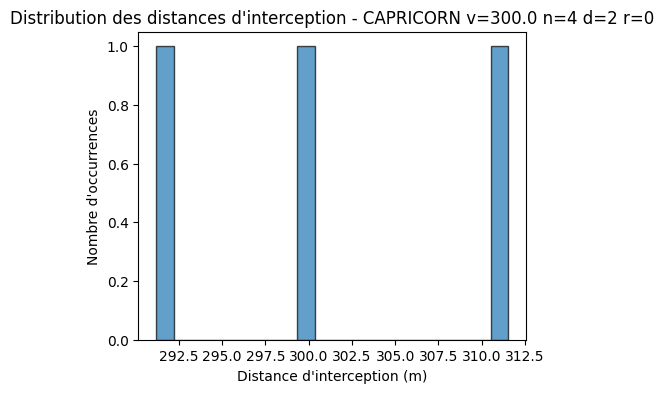


===== Analyse du Scénario: CAPRICORN v=300.0 n=4 d=2 r=1 =====
Configuration : scenario_name,CAPRICORN v=300.0 n=4 d=2 r=1
Nombre de cesnas : 4
Vitesse des cesnas : 300.0
Nombre de cesnas interceptés : 3
Nombre de tirs sur l'usine : 2
Nombre de missiles manqués : 6
Nombre de cesnas manqués : 1
Distance d'interception (moyenne) : 212.64
Distance d'interception (min) : 24.51
Distance d'interception (max) : 313.41


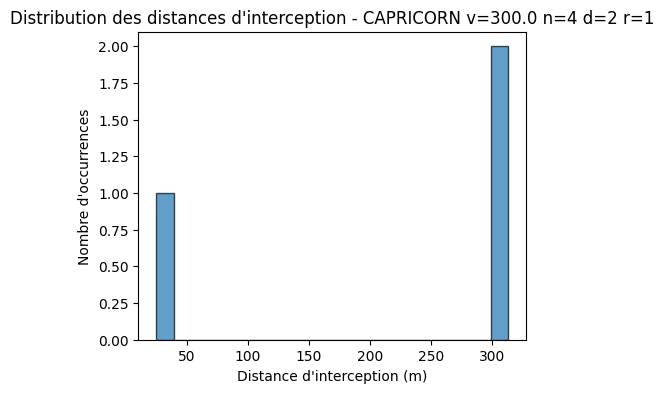


===== Analyse du Scénario: CAPRICORN v=300.0 n=4 d=3 r=0 =====
Configuration : scenario_name,CAPRICORN v=300.0 n=4 d=3 r=0
Nombre de cesnas : 4
Vitesse des cesnas : 300.0
Nombre de cesnas interceptés : 3
Nombre de tirs sur l'usine : 1
Nombre de missiles manqués : 6
Nombre de cesnas manqués : 1
Distance d'interception (moyenne) : 297.20
Distance d'interception (min) : 294.87
Distance d'interception (max) : 300.00


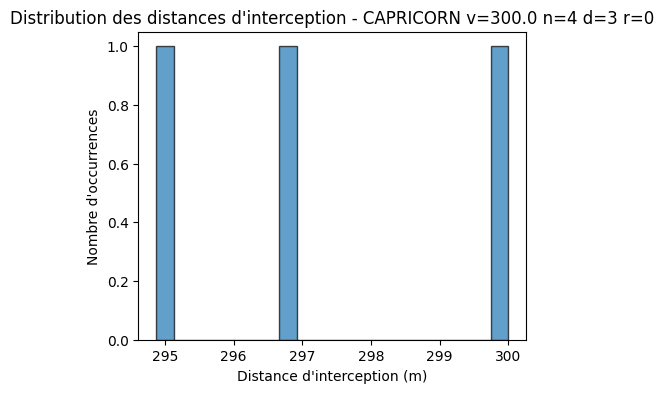


===== Analyse du Scénario: CAPRICORN v=300.0 n=4 d=3 r=1 =====
Configuration : scenario_name,CAPRICORN v=300.0 n=4 d=3 r=1
Nombre de cesnas : 4
Vitesse des cesnas : 300.0
Nombre de cesnas interceptés : 2
Nombre de tirs sur l'usine : 0
Nombre de missiles manqués : 6
Nombre de cesnas manqués : 2
Distance d'interception (moyenne) : 305.77
Distance d'interception (min) : 300.00
Distance d'interception (max) : 311.53


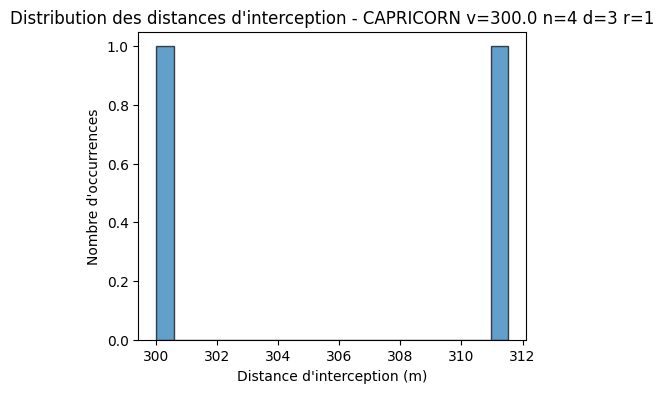


===== Analyse du Scénario: CAPRICORN v=300.0 n=4 d=4 r=0 =====
Configuration : scenario_name,CAPRICORN v=300.0 n=4 d=4 r=0
Nombre de cesnas : 4
Vitesse des cesnas : 300.0
Nombre de cesnas interceptés : 3
Nombre de tirs sur l'usine : 1
Nombre de missiles manqués : 6
Nombre de cesnas manqués : 1
Distance d'interception (moyenne) : 213.87
Distance d'interception (min) : 24.03
Distance d'interception (max) : 317.57


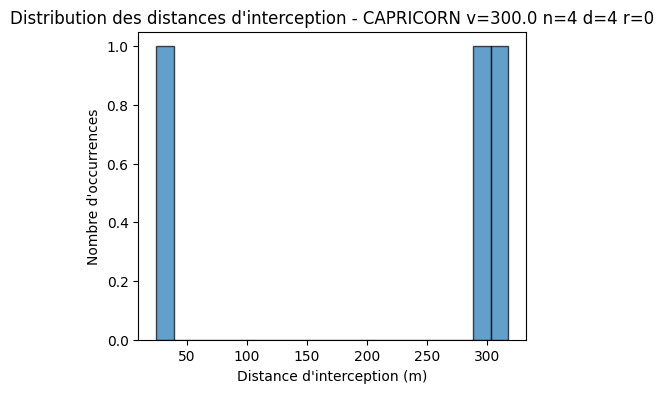


===== Analyse du Scénario: CAPRICORN v=300.0 n=4 d=4 r=1 =====
Configuration : scenario_name,CAPRICORN v=300.0 n=4 d=4 r=1
Nombre de cesnas : 4
Vitesse des cesnas : 300.0
Nombre de cesnas interceptés : 2
Nombre de tirs sur l'usine : 0
Nombre de missiles manqués : 6
Nombre de cesnas manqués : 2
Distance d'interception (moyenne) : 298.37
Distance d'interception (min) : 296.74
Distance d'interception (max) : 300.00


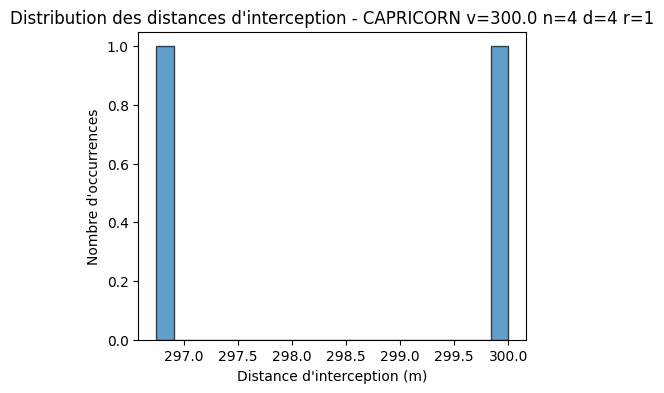


===== Analyse du Scénario: CAPRICORN v=300.0 n=5 d=0 r=0 =====
Configuration : scenario_name,CAPRICORN v=300.0 n=5 d=0 r=0
Nombre de cesnas : 5
Vitesse des cesnas : 300.0
Nombre de cesnas interceptés : 3
Nombre de tirs sur l'usine : 0
Nombre de missiles manqués : 8
Nombre de cesnas manqués : 2
Distance d'interception (moyenne) : 308.47
Distance d'interception (min) : 295.83
Distance d'interception (max) : 317.57


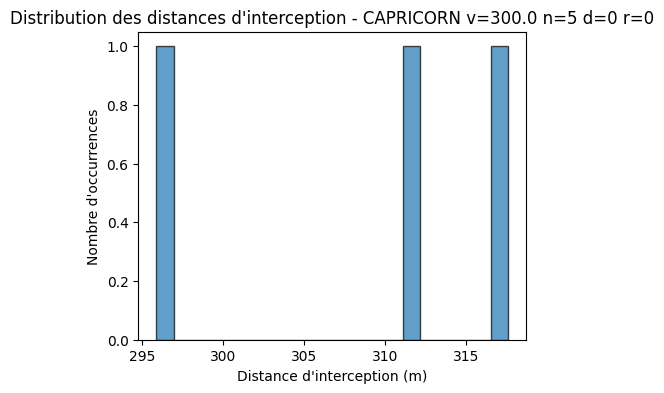


===== Analyse du Scénario: CAPRICORN v=300.0 n=5 d=0 r=1 =====
Configuration : scenario_name,CAPRICORN v=300.0 n=5 d=0 r=1
Nombre de cesnas : 5
Vitesse des cesnas : 300.0
Nombre de cesnas interceptés : 3
Nombre de tirs sur l'usine : 0
Nombre de missiles manqués : 9
Nombre de cesnas manqués : 2
Distance d'interception (moyenne) : 307.08
Distance d'interception (min) : 291.67
Distance d'interception (max) : 317.57


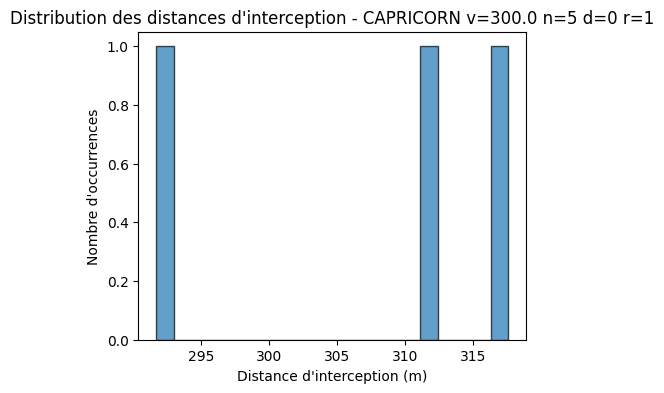


===== Analyse du Scénario: CAPRICORN v=300.0 n=5 d=1 r=0 =====
Configuration : scenario_name,CAPRICORN v=300.0 n=5 d=1 r=0
Nombre de cesnas : 5
Vitesse des cesnas : 300.0
Nombre de cesnas interceptés : 5
Nombre de tirs sur l'usine : 1
Nombre de missiles manqués : 8
Nombre de cesnas manqués : 0
Distance d'interception (moyenne) : 241.10
Distance d'interception (min) : 22.72
Distance d'interception (max) : 315.70


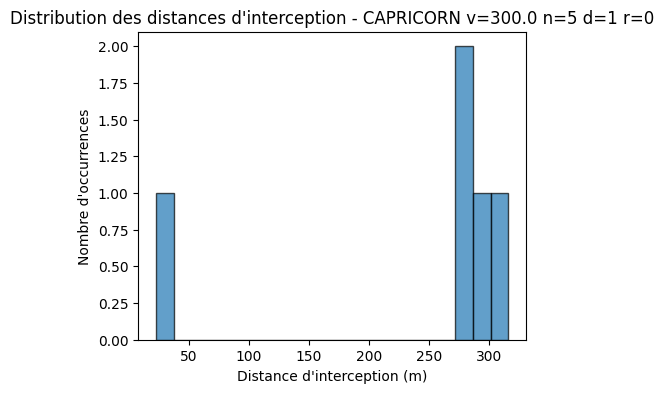


===== Analyse du Scénario: CAPRICORN v=300.0 n=5 d=1 r=1 =====
Configuration : scenario_name,CAPRICORN v=300.0 n=5 d=1 r=1
Nombre de cesnas : 5
Vitesse des cesnas : 300.0
Nombre de cesnas interceptés : 4
Nombre de tirs sur l'usine : 1
Nombre de missiles manqués : 8
Nombre de cesnas manqués : 1
Distance d'interception (moyenne) : 299.86
Distance d'interception (min) : 279.17
Distance d'interception (max) : 317.57


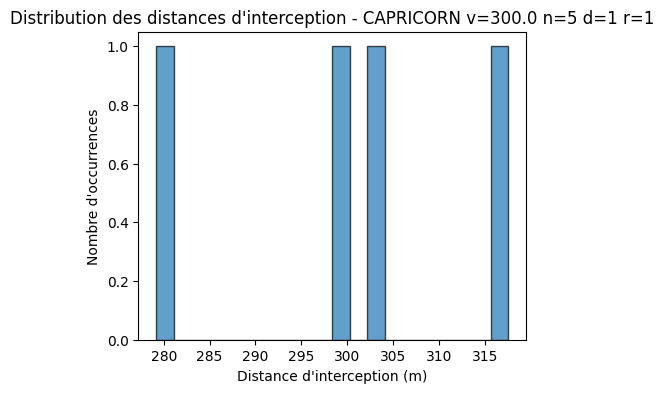


===== Analyse du Scénario: CAPRICORN v=300.0 n=5 d=2 r=0 =====
Configuration : scenario_name,CAPRICORN v=300.0 n=5 d=2 r=0
Nombre de cesnas : 5
Vitesse des cesnas : 300.0
Nombre de cesnas interceptés : 3
Nombre de tirs sur l'usine : 1
Nombre de missiles manqués : 11
Nombre de cesnas manqués : 2
Distance d'interception (moyenne) : 299.98
Distance d'interception (min) : 288.41
Distance d'interception (max) : 315.70


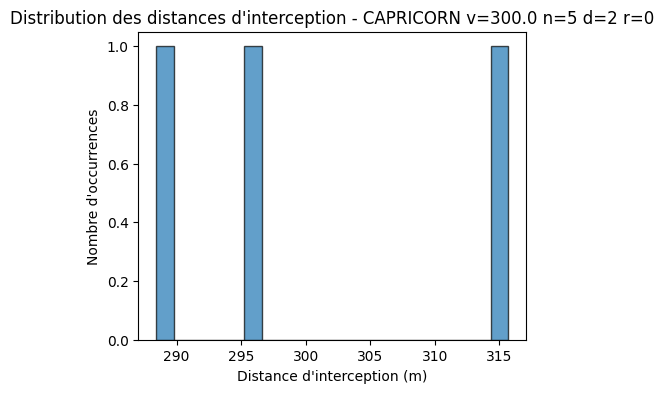


===== Analyse du Scénario: CAPRICORN v=300.0 n=5 d=2 r=1 =====
Configuration : scenario_name,CAPRICORN v=300.0 n=5 d=2 r=1
Nombre de cesnas : 5
Vitesse des cesnas : 300.0
Nombre de cesnas interceptés : 3
Nombre de tirs sur l'usine : 1
Nombre de missiles manqués : 8
Nombre de cesnas manqués : 2
Distance d'interception (moyenne) : 305.86
Distance d'interception (min) : 300.00
Distance d'interception (max) : 311.53


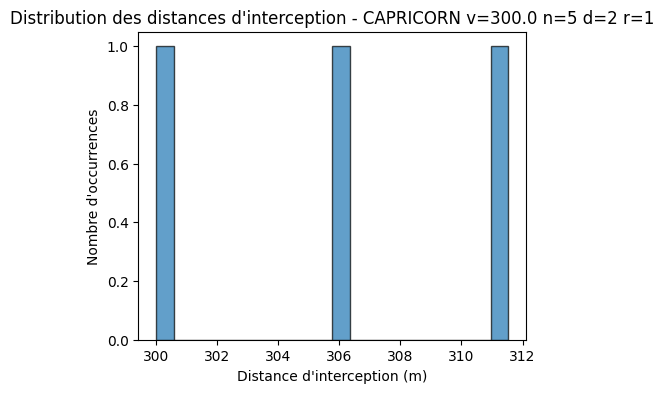


===== Analyse du Scénario: CAPRICORN v=300.0 n=5 d=3 r=0 =====
Configuration : scenario_name,CAPRICORN v=300.0 n=5 d=3 r=0
Nombre de cesnas : 5
Vitesse des cesnas : 300.0
Nombre de cesnas interceptés : 3
Nombre de tirs sur l'usine : 0
Nombre de missiles manqués : 7
Nombre de cesnas manqués : 2
Distance d'interception (moyenne) : 307.85
Distance d'interception (min) : 300.00
Distance d'interception (max) : 312.01


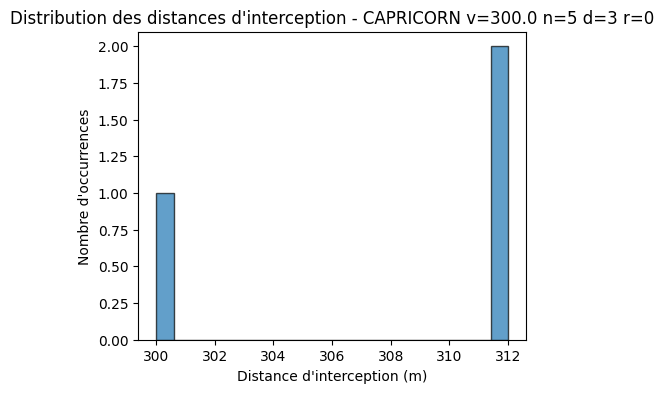


===== Analyse du Scénario: CAPRICORN v=300.0 n=5 d=3 r=1 =====
Configuration : scenario_name,CAPRICORN v=300.0 n=5 d=3 r=1
Nombre de cesnas : 5
Vitesse des cesnas : 300.0
Nombre de cesnas interceptés : 3
Nombre de tirs sur l'usine : 0
Nombre de missiles manqués : 7
Nombre de cesnas manqués : 2
Distance d'interception (moyenne) : 298.59
Distance d'interception (min) : 287.50
Distance d'interception (max) : 313.41


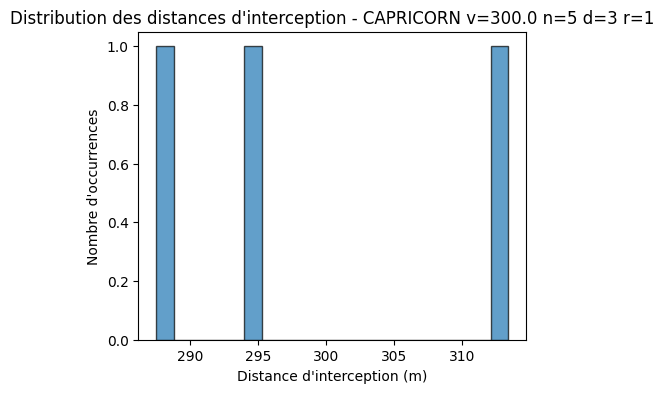


===== Analyse du Scénario: CAPRICORN v=300.0 n=5 d=4 r=0 =====
Configuration : scenario_name,CAPRICORN v=300.0 n=5 d=4 r=0
Nombre de cesnas : 5
Vitesse des cesnas : 300.0
Nombre de cesnas interceptés : 4
Nombre de tirs sur l'usine : 2
Nombre de missiles manqués : 9
Nombre de cesnas manqués : 1
Distance d'interception (moyenne) : 234.95
Distance d'interception (min) : 24.51
Distance d'interception (max) : 317.57


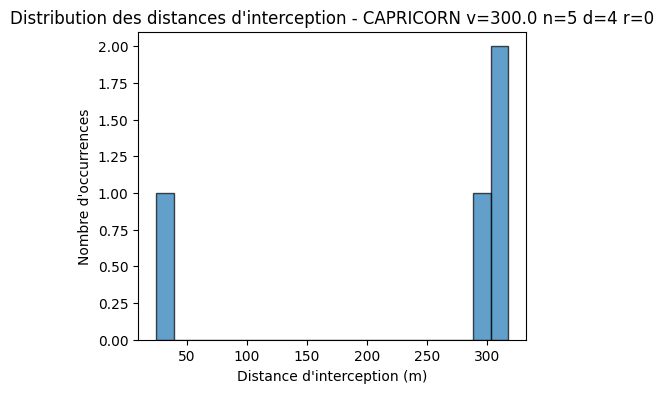


===== Analyse du Scénario: CAPRICORN v=300.0 n=5 d=4 r=1 =====
Configuration : scenario_name,CAPRICORN v=300.0 n=5 d=4 r=1
Nombre de cesnas : 5
Vitesse des cesnas : 300.0
Nombre de cesnas interceptés : 3
Nombre de tirs sur l'usine : 1
Nombre de missiles manqués : 10
Nombre de cesnas manqués : 2
Distance d'interception (moyenne) : 297.36
Distance d'interception (min) : 291.17
Distance d'interception (max) : 300.91


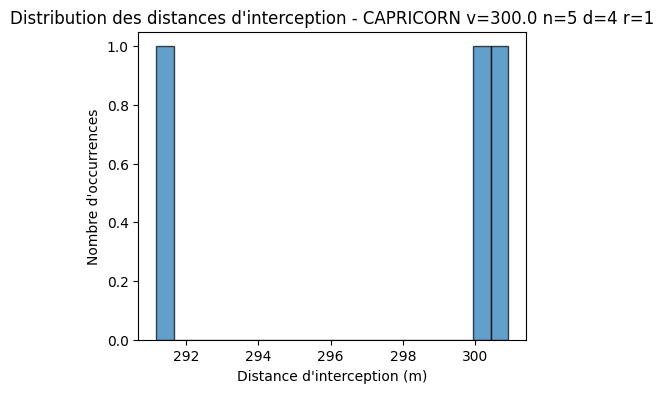


===== Analyse Globale =====
                         Scenario Nb Cesnas Vitesse Cesnas  Interceptions  \
0                        Scenario   Inconnu        Inconnu              0   
1   CAPRICORN v=200.0 n=3 d=0 r=0         3          200.0              2   
2   CAPRICORN v=200.0 n=3 d=0 r=1         3          200.0              1   
3   CAPRICORN v=200.0 n=3 d=1 r=0         3          200.0              3   
4   CAPRICORN v=200.0 n=3 d=1 r=1         3          200.0              2   
..                            ...       ...            ...            ...   
56  CAPRICORN v=300.0 n=5 d=2 r=1         5          300.0              3   
57  CAPRICORN v=300.0 n=5 d=3 r=0         5          300.0              3   
58  CAPRICORN v=300.0 n=5 d=3 r=1         5          300.0              3   
59  CAPRICORN v=300.0 n=5 d=4 r=0         5          300.0              4   
60  CAPRICORN v=300.0 n=5 d=4 r=1         5          300.0              3   

    Missiles Manqués  Tirs sur l'usine  Moy. D

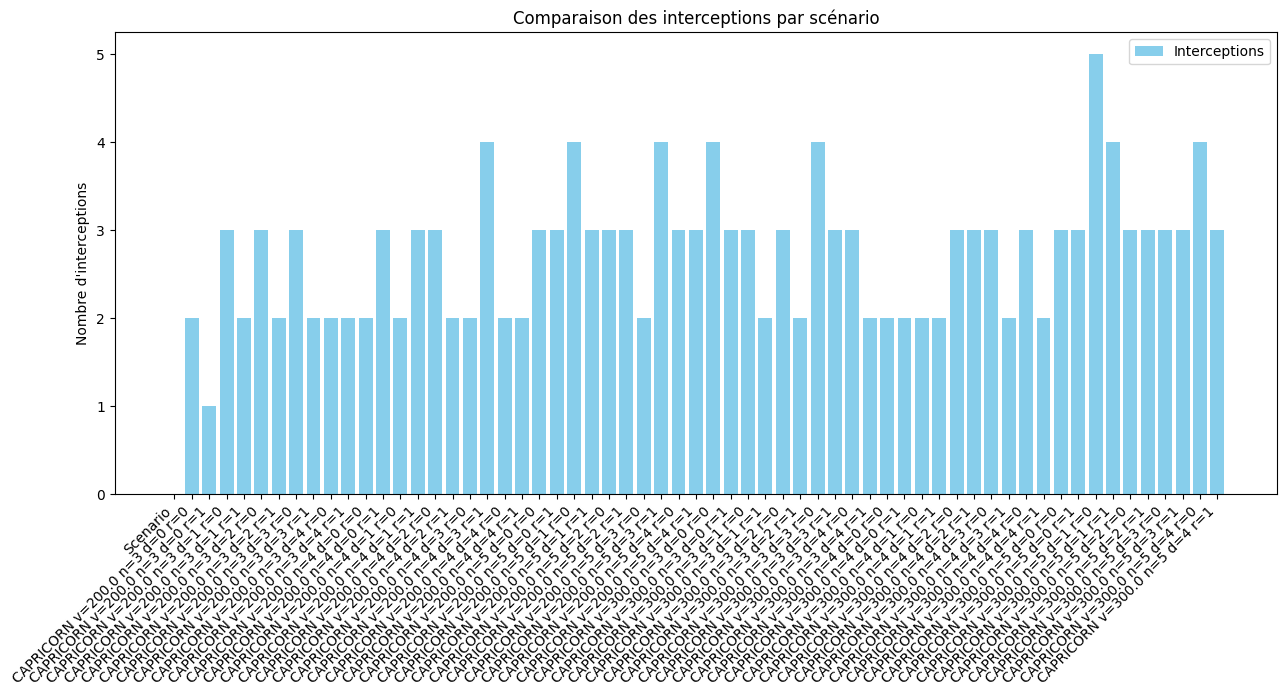

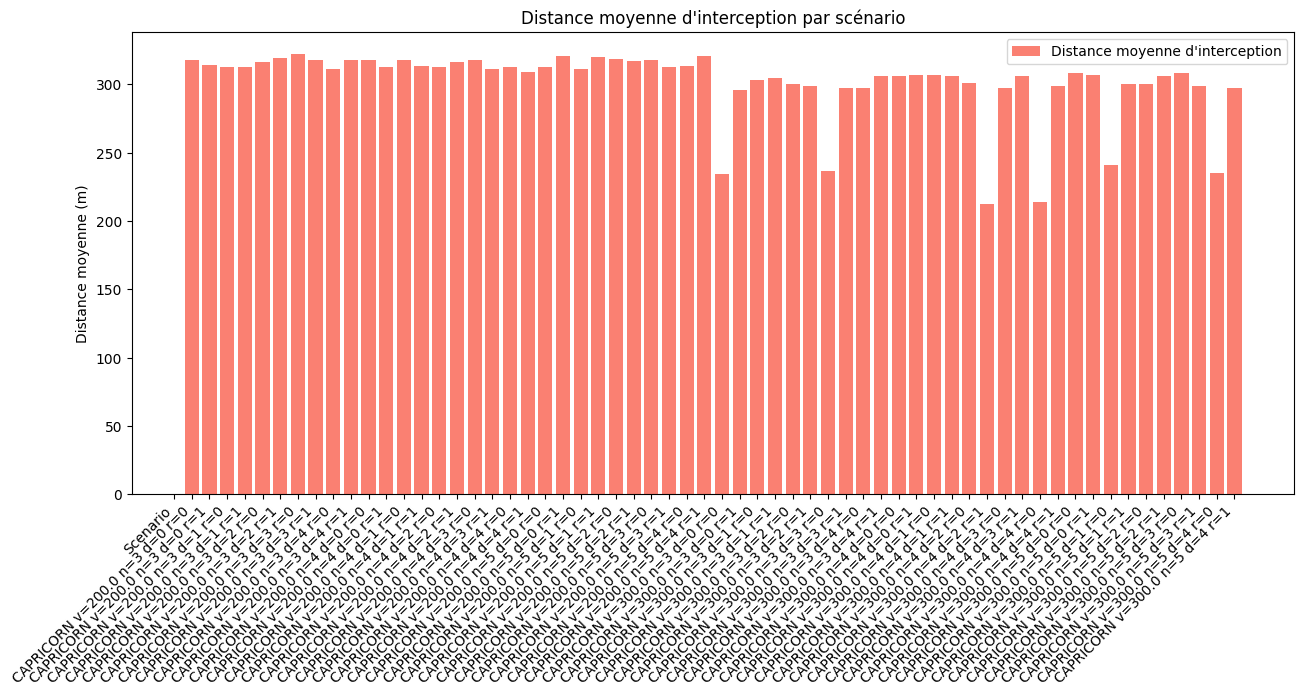

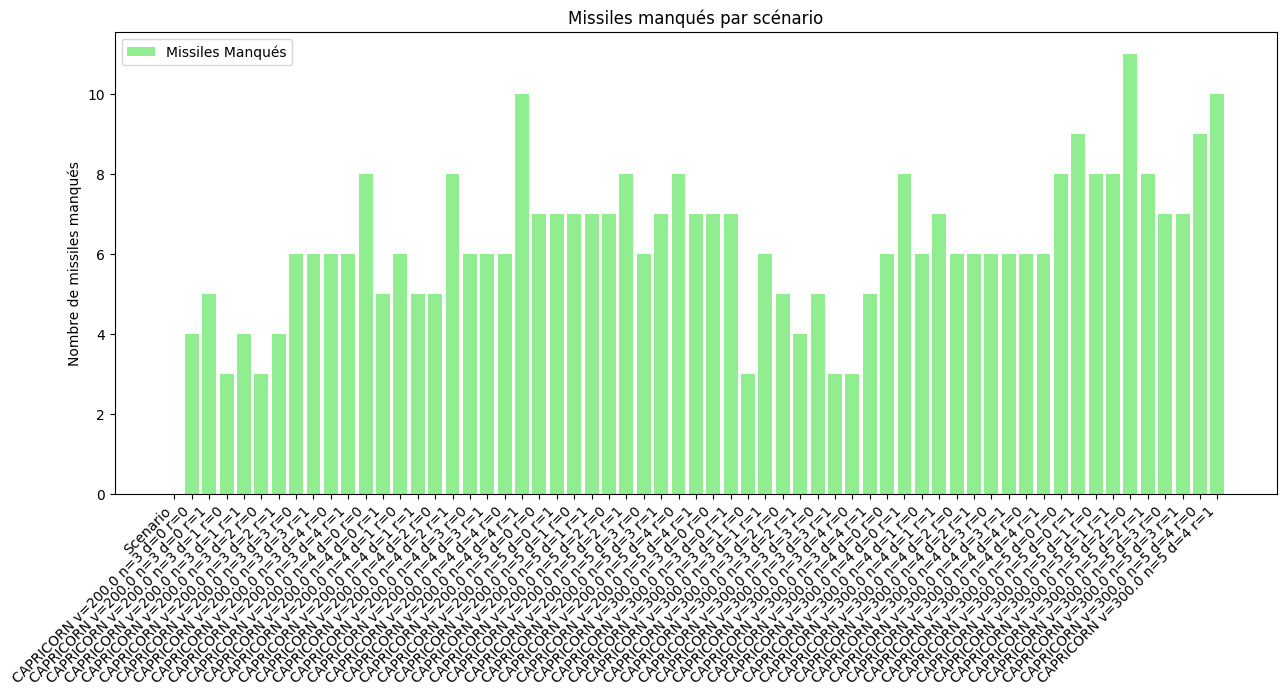

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import os

# Charger le fichier CSV
log_file = "../log/1740402363068capricorn.csv"

if not os.path.exists(log_file):
    print("Aucun fichier CSV trouvé.")
else:
    # Charger le fichier CSV
    df = pd.read_csv(log_file, delimiter=";", header=None, names=[
        "Scenario", "Col2", "Timestamp", "LogicalDate", "DetailLevel", "Component", "Function", "Message"
    ])

    # Extraire les configurations des scénarios
    scenario_configs = {}
    last_scenario_name = None

    default_scenarios = df[df["Scenario"] == "DefaultScenario"]
    
    for _, row in default_scenarios.iterrows():
        message = row["Message"]

        # Si le message contient "scenario_name,", c'est l'identifiant du scénario
        if "scenario_name," in message:
            last_scenario_name = message.split("scenario_name,")[-1]
            scenario_configs[last_scenario_name] = {"config": message, "nb_mobiles": None, "mobiles_speed": None}

        # Stocker nb_mobiles et mobiles_speed
        elif last_scenario_name:
            if "nb_mobiles," in message:
                scenario_configs[last_scenario_name]["nb_mobiles"] = int(message.split("nb_mobiles,")[-1])
            elif "mobiles_speed," in message:
                scenario_configs[last_scenario_name]["mobiles_speed"] = float(message.split("mobiles_speed,")[-1])

    # Supprimer les lignes de configuration pour ne garder que les événements
    df = df[df["Scenario"] != "DefaultScenario"]

    # Stockage des statistiques par scénario
    global_stats = []

    # Fonction d'analyse par scénario
    def analyze_scenario(data, scenario_name, config):
        nb_mobiles = config.get("nb_mobiles", "Inconnu")
        mobiles_speed = config.get("mobiles_speed", "Inconnu")

        # Nombre de cesnas interceptés
        num_cesnas_caught = data[data["Function"] == "checkImpact"]["Message"].str.contains("Interception_mobile").sum()

        # Nombre de tirs sur l’usine
        num_factory_shots = data[data["Function"] == "propertyChange"]["Message"].str.contains("factory_damage").sum()

        # Nombre de missiles tirés et manqués
        num_missiles_shot = data[data["Function"] == "scheduleFireMissile"]["Message"].str.contains("missile_shot").sum()
        num_missiles_missed = num_missiles_shot - num_cesnas_caught

        # Nombre de cesnas non interceptés
        num_cesnas_missed = nb_mobiles - num_cesnas_caught if isinstance(nb_mobiles, int) else "Inconnu"

        # Distances d'interception
        distances = data[data["Function"] == "checkImpact"]["Message"].str.extract(r'distance, ([\d.]+)').dropna().astype(float)
        mean_distance = distances.mean()[0] if not distances.empty else None
        min_distance = distances.min()[0] if not distances.empty else None
        max_distance = distances.max()[0] if not distances.empty else None

        # Stocker les stats globales
        global_stats.append({
            "Scenario": scenario_name,
            "Nb Cesnas": nb_mobiles,
            "Vitesse Cesnas": mobiles_speed,
            "Interceptions": num_cesnas_caught,
            "Missiles Manqués": num_missiles_missed,
            "Tirs sur l'usine": num_factory_shots,
            "Moy. Dist Interception": mean_distance
        })

        # Résumé des résultats
        print(f"\n===== Analyse du Scénario: {scenario_name} =====")
        print(f"Configuration : {config['config']}")
        print(f"Nombre de cesnas : {nb_mobiles}")
        print(f"Vitesse des cesnas : {mobiles_speed}")
        print(f"Nombre de cesnas interceptés : {num_cesnas_caught}")
        print(f"Nombre de tirs sur l'usine : {num_factory_shots}")
        print(f"Nombre de missiles manqués : {num_missiles_missed}")
        print(f"Nombre de cesnas manqués : {num_cesnas_missed}")
        print(f"Distance d'interception (moyenne) : {mean_distance:.2f}" if mean_distance is not None else "Aucune interception enregistrée")
        print(f"Distance d'interception (min) : {min_distance:.2f}" if min_distance is not None else "")
        print(f"Distance d'interception (max) : {max_distance:.2f}" if max_distance is not None else "")

        # Affichage des distances d'interception
        if not distances.empty:
            plt.figure(figsize=(5, 4))
            plt.hist(distances[0], bins=20, edgecolor='black', alpha=0.7)
            plt.xlabel("Distance d'interception (m)")
            plt.ylabel("Nombre d'occurrences")
            plt.title(f"Distribution des distances d'interception - {scenario_name}")
            plt.show()

    # Analyse par scénario
    for scenario in df["Scenario"].unique():
        analyze_scenario(df[df["Scenario"] == scenario], scenario, scenario_configs.get(scenario, {"config": "Configuration non trouvée"}))

    # Convertir les stats globales en DataFrame
    global_df = pd.DataFrame(global_stats)

    # Afficher les stats globales
    print("\n===== Analyse Globale =====")
    print(global_df)

    # Graphique : Comparaison des interceptions par scénario
    plt.figure(figsize=(15, 6))
    plt.bar(global_df["Scenario"], global_df["Interceptions"], color="skyblue", label="Interceptions")
    plt.xticks(rotation=45, ha="right")
    plt.ylabel("Nombre d'interceptions")
    plt.title("Comparaison des interceptions par scénario")
    plt.legend()
    plt.show()

    # Graphique : Moyenne des distances d'interception par scénario
    plt.figure(figsize=(15, 6))
    plt.bar(global_df["Scenario"], global_df["Moy. Dist Interception"], color="salmon", label="Distance moyenne d'interception")
    plt.xticks(rotation=45, ha="right")
    plt.ylabel("Distance moyenne (m)")
    plt.title("Distance moyenne d'interception par scénario")
    plt.legend()
    plt.show()

    # Graphique : Comparaison du nombre de missiles manqués
    plt.figure(figsize=(15, 6))
    plt.bar(global_df["Scenario"], global_df["Missiles Manqués"], color="lightgreen", label="Missiles Manqués")
    plt.xticks(rotation=45, ha="right")
    plt.ylabel("Nombre de missiles manqués")
    plt.title("Missiles manqués par scénario")
    plt.legend()
    plt.show()
